앞으로 다양한 투자 전략을 살펴보기에 앞서,  
전략 성과를 측정하기 위한 지표를 알아보는 시간입니다.

# 투자성과 지표

* 단일 종목 일간수익률
* 단일 종목 누적수익률
* CAGR
* MDD

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = {'close': [100, 95, 101, 103, 90, 95, 110, 98, 101]} # 9일 간 가격 데이터, 
index = pd.to_datetime(["2022-05-17", "2022-05-18" , "2022-05-19", "2022-05-20", "2022-05-23", "2022-05-24", "2022-05-25", "2022-05-26", "2022-05-27"])
df = pd.DataFrame(data=data, index=index) # 데이터 프레임 생성
df

,close
2022-05-17,100
2022-05-18,95
2022-05-19,101
2022-05-20,103
2022-05-23,90
2022-05-24,95
2022-05-25,110
2022-05-26,98
2022-05-27,101


<AxesSubplot:>

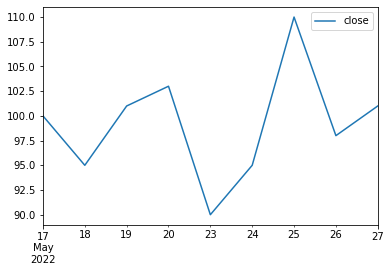

In [5]:
df.plot()

### 단일종목 일간 수익률

일간 수익률 = `당기 가격 / 전기 가격` 으로 계산할 수 있습니다.  
판다스의 `shift 메서드`를 이용해서 간편하게 계산할 수 있습니다.  
`shift(n)` 메서드는 `n`만큼 아래로 이동시키는 기능을 합니다.

In [8]:
df.shift(1)

,close
2022-05-17,NaN
2022-05-18,100.0
2022-05-19,95.0
2022-05-20,101.0
2022-05-23,103.0
2022-05-24,90.0
2022-05-25,95.0
2022-05-26,110.0
2022-05-27,98.0


In [9]:
dayReturn = df / df.shift(1)
dayReturn

,close
2022-05-17,NaN
2022-05-18,0.950000
2022-05-19,1.063158
2022-05-20,1.019802
2022-05-23,0.873786
2022-05-24,1.055556
2022-05-25,1.157895
2022-05-26,0.890909
2022-05-27,1.030612


간단하게 일간 수익률을 구했습니다. 다만, 첫번째 수익률은 1로 해주면 되겠죠.  
`fillna()` 메서드를 사용하면 nan를 원하는 값으로 바꿀 수 있습니다.

In [10]:
dayReturn = (df / df.shift(1)).fillna(1)
dayReturn

,close
2022-05-17,1.000000
2022-05-18,0.950000
2022-05-19,1.063158
2022-05-20,1.019802
2022-05-23,0.873786
2022-05-24,1.055556
2022-05-25,1.157895
2022-05-26,0.890909
2022-05-27,1.030612


### 단일종목 누적 수익률

주가의 움직임은 복리입니다.  
일간 수익률을 누적곱해주면 누적 수익률을 구할 수 있습니다.  
`cumprod()`메서드를 사용하면 누적곱을 구할 수 있습니다.



In [11]:
cumulativeReturn = dayReturn.cumprod()
cumulativeReturn

,close
2022-05-17,1.00
2022-05-18,0.95
2022-05-19,1.01
2022-05-20,1.03
2022-05-23,0.90
2022-05-24,0.95
2022-05-25,1.10
2022-05-26,0.98
2022-05-27,1.01


여기서 중요한 점은,  
누적 수익률은 `자산의 흐름`과 같다고 볼 수 있습니다.  
내가 1원을 투자했다고 한다면, 1원이 주가 변동에 따라 최종적으로 평가금액이 얼마인지를 알려주는 지표입니다.

### CAGR (compound annual growth rate)

투자 수익률를 계산할 떄는 복리 개념이기 때문에, 흔히 알고 있는 산술평균이 아니라 기하평균으로 계산해야 합니다.  
산술평균 = 합의 평균  
기하평균 = 곱의 평균  

1년차 수익률 5%,  
2년차 수익률 10%

2년 투자 기간동안의 연 평균 수익률 k라고 했을 때..

k =  $\sqrt{0.05 * 0.1}$

**하지만 우리는 앞으로 일간 데이터를 사용할 것이기 때문에,**  
**일간 데이터를 활용하여 연간 수익률을 계산하기 위해서는**  
`(일간 수익률 갯수) / (영업일)` 역수 제곱으로 연산합니다.  
일반적으로 금융공학에서는 1년의 총 영업일을 252일로 간주합니다.

In [12]:
len(df)

9

In [15]:
cagr = cumulativeReturn.iloc[-1]  ** (252 / len(df))
cagr

close    1.321291
Name: 2022-05-27 00:00:00, dtype: float64

### Draw Down (하락폭) && Max Draw Down (최대하락폭)

최대 낙폭지수,투자 기간 동안 고점부터 떨어진 낙폭 최댓값을 의미합니다.  
최종 수익률만 보고 판단하기 쉬운데, 사실 투자 기간동안 50%가 빠지면 심리적 타격도 있기 때문에 손절하고 투자를 중단할 수도 있습니다.  
그렇기 때문에 최대 낙폭은 가능한 낮을수록 좋습니다.

하락폭(DD) = $ \frac{최고점 - 현재}{최고점} $  
최대하락폭(MDD) = max ($ \frac{최고점 - 현재}{최고점} $)

Pandas의 `cummax()` 메서드를 사용하면 데이터를 위에서부터 아래로 조회하며 최대값을 갱신합니다.

In [16]:
cumulativeReturn

,close
2022-05-17,1.00
2022-05-18,0.95
2022-05-19,1.01
2022-05-20,1.03
2022-05-23,0.90
2022-05-24,0.95
2022-05-25,1.10
2022-05-26,0.98
2022-05-27,1.01


In [17]:
cumulativeReturn.cummax()

,close
2022-05-17,1.00
2022-05-18,1.00
2022-05-19,1.01
2022-05-20,1.03
2022-05-23,1.03
2022-05-24,1.03
2022-05-25,1.10
2022-05-26,1.10
2022-05-27,1.10


**MDD 계산**

In [21]:
dd = (cumulativeReturn.cummax() - cumulativeReturn) / cumulativeReturn.cummax() * 100
dd

,close
2022-05-17,0.000000
2022-05-18,5.000000
2022-05-19,0.000000
2022-05-20,0.000000
2022-05-23,12.621359
2022-05-24,7.766990
2022-05-25,0.000000
2022-05-26,10.909091
2022-05-27,8.181818


In [22]:
mdd = dd.max()
mdd

close    12.621359
dtype: float64